In [181]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data
import math
import copy
import torch
import torch.nn as nn
import torch.nn.functional as F
import random
import pandas as pd
import numpy as np
from   sklearn.preprocessing   import LabelEncoder          # кодировка категорий
import pandas as pd
from torch.autograd import Variable
import numpy as np
import torch.functional as F
from   sklearn.preprocessing   import LabelEncoder          # кодировка категорий
from   sklearn.decomposition import PCA
from   sklearn import linear_model
import matplotlib.pyplot as plt                   # постороение графиков
import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import torch.optim as optim
import torch
from torch.utils.data import DataLoader, TensorDataset

In [182]:
# Читаем файл с компетенциями
df = pd.read_excel('/content/Dataset_L_4_25_diff_4_COLAB.xlsx')

In [183]:
df['SKILLS'] = df['SKILLS'].astype(str)

# Длинна каждого посчитаем длинну
df['list_of_skill'] = df['SKILLS'].apply(lambda x: x.split(','))

In [184]:
df['cnt_skill'] = df['list_of_skill'].apply(lambda x: len(x))

In [185]:
df.head(5)

,SKILLS,list_of_skill,cnt_skill
0,"1С ПРЕДПРИЯТИЕ 8,ФИНАНСОВАЯ ОТЧЕТНОСТЬ,УЧЕТ ОС...","[1С ПРЕДПРИЯТИЕ 8, ФИНАНСОВАЯ ОТЧЕТНОСТЬ, УЧЕТ...",25
1,"1С ТОРГОВЛЯ,КЛИЕНТООРИЕНТИРОВАННОСТЬ,1С УПРАВЛ...","[1С ТОРГОВЛЯ, КЛИЕНТООРИЕНТИРОВАННОСТЬ, 1С УПР...",25
2,"1С УПРАВЛЕНИЕ ТОРГОВЛЕЙ,1С БИТРИКС,CRM,B2B ПРО...","[1С УПРАВЛЕНИЕ ТОРГОВЛЕЙ, 1С БИТРИКС, CRM, B2B...",25
3,"3D ГРАФИКА,ГРАФИЧЕСКИЙ ДИЗАЙН,ADOBE INDESIGN,В...","[3D ГРАФИКА, ГРАФИЧЕСКИЙ ДИЗАЙН, ADOBE INDESIG...",25
4,"ADOBE PHOTOSHOP,ФОТОГРАФИЯ,ДИЗАЙН,ОБРАБОТКА ИЗ...","[ADOBE PHOTOSHOP, ФОТОГРАФИЯ, ДИЗАЙН, ОБРАБОТК...",25


In [186]:
df_skill = df[(df.cnt_skill > 11) & (df.cnt_skill < 26)]

In [187]:
data = df_skill

In [188]:
len(data)

38799

In [189]:
# Создаем словарь
vocabulary = []
vocabulary.append('[PAD]')
vocabulary.append('[MASK]')
for i, row  in data.iterrows():
    for j in data["list_of_skill"][i]:
        if j not in vocabulary:
            vocabulary.append(j)
word2idx = {w: idx for (idx, w) in enumerate(vocabulary)}
idx2word = {idx: w for (idx, w) in enumerate(vocabulary)}
vocabulary_size = len(vocabulary)

In [190]:
vocabulary_size

19678

In [191]:
from collections import Counter

# Создадим список всех слов в списке слов
all_words = [word for sublist in data.list_of_skill for word in sublist]

# Подсчитаем количество повторений каждого слова
word_counts = Counter(all_words)

# Выведем результат
print(word_counts)

Counter({'РАБОТА В КОМАНДЕ': 14279, 'ГРАМОТНАЯ РЕЧЬ': 13794, 'ПОЛЬЗОВАТЕЛЬ ПК': 9613, 'ДЕЛОВОЕ ОБЩЕНИЕ': 8252, 'ВЕДЕНИЕ ПЕРЕГОВОРОВ': 7812, 'ТЕЛЕФОННЫЕ ПЕРЕГОВОРЫ': 7626, 'АКТИВНЫЕ ПРОДАЖИ': 7323, 'ДЕЛОВАЯ ПЕРЕПИСКА': 6726, 'НАВЫКИ ПРОДАЖ': 6116, 'ОРГАНИЗАТОРСКИЕ НАВЫКИ': 5281, 'ПОИСК И ПРИВЛЕЧЕНИЕ КЛИЕНТОВ': 5145, 'ОРИЕНТАЦИЯ НА РЕЗУЛЬТАТ': 4767, 'ГРАМОТНОСТЬ': 4640, 'РАБОТА С БОЛЬШИМ ОБЪЕМОМ ИНФОРМАЦИИ': 4615, 'ДЕЛОВАЯ КОММУНИКАЦИЯ': 4493, 'ЗАКЛЮЧЕНИЕ ДОГОВОРОВ': 4362, 'УМЕНИЕ РАБОТАТЬ В КОМАНДЕ': 3896, 'РАБОТА В УСЛОВИЯХ МНОГОЗАДАЧНОСТИ': 3692, 'ПРЯМЫЕ ПРОДАЖИ': 3584, 'КЛИЕНТООРИЕНТИРОВАННОСТЬ': 3482, 'РАЗВИТИЕ ПРОДАЖ': 3261, 'B2B ПРОДАЖИ': 3161, 'УПРАВЛЕНИЕ ПЕРСОНАЛОМ': 3060, 'АНГЛИЙСКИЙ ЯЗЫК': 2937, 'ХОЛОДНЫЕ ПРОДАЖИ': 2858, 'ОБУЧЕНИЕ И РАЗВИТИЕ': 2792, 'КОММУНИКАБЕЛЬНОСТЬ': 2737, 'ОТВЕТСТВЕННОСТЬ': 2734, 'ПРОВЕДЕНИЕ ПРЕЗЕНТАЦИЙ': 2665, 'CRM': 2527, 'МНОГОЗАДАЧНОСТЬ': 2514, 'УПРАВЛЕНИЕ ПРОДАЖАМИ': 2488, 'ОБУЧЕНИЕ ПЕРСОНАЛА': 2359, '1С ПРЕДПРИЯТИЕ 8': 2305, 'ВЕДЕНИЕ КЛИЕНТСКОЙ БАЗЫ

In [192]:
from collections import Counter

# Создадим список всех слов в списке слов
all_words = [word for sublist in data.list_of_skill for word in sublist]

# Подсчитаем количество повторений каждого слова
word_counts = Counter(all_words)

# Получим список слов, которые встречаются всего один раз
unique_words = [word for word, count in word_counts.items() if count == 1]

# Выведем результат
print(unique_words)

['ГОРНЫЙ ИНЖЕНЕР', 'ОГР', 'РАСХОДНЫЕ МАТЕРИАЛЫ', 'ПРОДАЖА КОМПЛЕКТУЮЩИХ', 'СВАРОЧНОЕ ОБОРУДОВАНИЕ', 'ОБОРУДОВАНИЕ ДЛЯ ПРОИЗВОДСТВ', 'ОБОРУДОВАНИЕ ДЛЯ ПРОИЗВОДСТВЕННЫХ ПРЕДПРИЯТИЙ', 'AGILE МЕТОДОЛОГИИ', 'ИНТЕГРАЦИОННЫЕ ПРОЕКТЫ', 'MANGO DB', 'TARGET', 'VISUAL SLAM', 'LIDAR SIGNAL PROCESSING', 'RADAR SIGNAL PROCESSING', 'CONVEX OPTIMIZATION', 'BAYESIAN METHODS', 'SIMULTANEOUS LOCALIZATION AND MAPPING', 'NEURO INSPIRED ALGORITHMS', 'BRAIN MIMETIC ALGORITHMS', 'ADVANCED COMPUTING', 'EMERGING COMPUTING', 'INNOVATIVE RESEARCH', 'EVENT BASED COMPUTING AND SENSORS', 'RESTIFY', 'THRIFT', 'JASMINE', 'AVA', 'JAGGER', 'CI CD PIPELINE ОВ', 'РАСПРЕДЕЛЕННЫЕ СУБД', 'GNU C', 'INTEL C', 'ELK EFK', 'ROUTEROS CHR', 'VCLOUD DIRECTOR', 'САМОСТОЯТЕЛЬНОСТЬ В ПРИНЯТИИ РЕШЕНИЙ', 'ВЛАДЕНИЕ ФУНДАМЕНТАЛЬНЫМИ НАВЫКАМИ И ЗНАНИЯМИ В ОБЛАСТИ АВТОМАТИЗАЦИИ', 'РОБОТЫ', 'РТС', 'РОБОТОТЕХНИЧЕСКИЕ СИСТЕМЫ', 'КОМПОНЕНТЫ И КОМПЛЕКСЫ', 'MICROSOFT BI', 'DATASTREAMING', 'REAL TIME DATABASE', 'LAMBDA', 'DATA VAULT', 'КИМБАЛЛ', 'И

In [193]:
len(unique_words)

12228

In [194]:
## Преобразуйте объект Counter в DataFrame
#word_count_df = pd.DataFrame(list(word_counts.items()), columns=['Skill', 'Count'])

In [195]:
#word_count_df.to_excel('word_count_df.xlsx')

In [196]:
# Случайная сортировка списков
for index, row in data.iterrows():
    random.shuffle(row['list_of_skill'])

In [197]:
len_tokens = 25

In [198]:
data['list_of_skill'] = data['list_of_skill'].apply(lambda x: x + ['[PAD]' for _ in range(len_tokens - len(x))])

<ipython-input-198-653f8f11be4d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['list_of_skill'] = data['list_of_skill'].apply(lambda x: x + ['[PAD]' for _ in range(len_tokens - len(x))])


In [199]:
data['target']= data['list_of_skill'].apply(lambda x: x[0])

<ipython-input-199-213780b1f4fe>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['target']= data['list_of_skill'].apply(lambda x: x[0])


In [200]:
data['seq'] = data['list_of_skill'].apply(lambda x: ['[MASK]'] + x[1:] if len(x) > 0 else [])

<ipython-input-200-725515475f96>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['seq'] = data['list_of_skill'].apply(lambda x: ['[MASK]'] + x[1:] if len(x) > 0 else [])


In [201]:
data

,SKILLS,list_of_skill,cnt_skill,target,seq
0,"1С ПРЕДПРИЯТИЕ 8,ФИНАНСОВАЯ ОТЧЕТНОСТЬ,УЧЕТ ОС...","[АНАЛИТИЧЕСКОЕ МЫШЛЕНИЕ, УЧЕТ ОСТАТКОВ, SLACK,...",25,АНАЛИТИЧЕСКОЕ МЫШЛЕНИЕ,"[[MASK], УЧЕТ ОСТАТКОВ, SLACK, CRM BITRIX24, 1..."
1,"1С ТОРГОВЛЯ,КЛИЕНТООРИЕНТИРОВАННОСТЬ,1С УПРАВЛ...","[РАСЧЕТЫ С ПОСТАВЩИКАМИ, ИНВЕНТАРИЗАЦИЯ, 1С УП...",25,РАСЧЕТЫ С ПОСТАВЩИКАМИ,"[[MASK], ИНВЕНТАРИЗАЦИЯ, 1С УПРАВЛЕНИЕ ТОРГОВЛ..."
2,"1С УПРАВЛЕНИЕ ТОРГОВЛЕЙ,1С БИТРИКС,CRM,B2B ПРО...","[РУКОВОДСТВО КОЛЛЕКТИВОМ, 1С БИТРИКС, УМЕНИЕ Р...",25,РУКОВОДСТВО КОЛЛЕКТИВОМ,"[[MASK], 1С БИТРИКС, УМЕНИЕ РАБОТАТЬ В КОМАНДЕ..."
3,"3D ГРАФИКА,ГРАФИЧЕСКИЙ ДИЗАЙН,ADOBE INDESIGN,В...","[CORELDRAW, ГРАФИЧЕСКИЙ ДИЗАЙН, 3D МОДЕЛИРОВАН...",25,CORELDRAW,"[[MASK], ГРАФИЧЕСКИЙ ДИЗАЙН, 3D МОДЕЛИРОВАНИЕ,..."
4,"ADOBE PHOTOSHOP,ФОТОГРАФИЯ,ДИЗАЙН,ОБРАБОТКА ИЗ...","[HTML, PHP, АДМИНИСТРИРОВАНИЕ САЙТОВ, ОБРАБОТК...",25,HTML,"[[MASK], PHP, АДМИНИСТРИРОВАНИЕ САЙТОВ, ОБРАБО..."
...,...,...,...,...,...
38794,"ЯНДЕКС ДИРЕКТ,ЯНДЕКС МЕТРИКА,GOOGLE ANALYTICS,...","[ПРОДВИЖЕНИЕ ОБЪЕКТА, ВНЕШНИЙ АУДИТ КОНТЕКСТНО...",12,ПРОДВИЖЕНИЕ ОБЪЕКТА,"[[MASK], ВНЕШНИЙ АУДИТ КОНТЕКСТНОЙ РЕКЛАМЫ, КО..."
38795,"ЯНДЕКС МЕТРИКА,GOOGLE ANALYTICS,WEB АНАЛИТИКА,...","[A B ТЕСТЫ, WEB АНАЛИТИКА, APPSFLYER, ЯНДЕКС М...",12,A B ТЕСТЫ,"[[MASK], WEB АНАЛИТИКА, APPSFLYER, ЯНДЕКС МЕТР..."
38796,"ЯНДЕКС МЕТРИКА,GOOGLE ANALYTICS,ЯНДЕКС ДИРЕКТ,...","[КОНТЕКСТНАЯ РЕКЛАМА, GOOGLE ADWORDS, GOOGLE A...",12,КОНТЕКСТНАЯ РЕКЛАМА,"[[MASK], GOOGLE ADWORDS, GOOGLE ANALYTICS, ЯНД..."
38797,"ЯНДЕКС МЕТРИКА,GOOGLE ANALYTICS,ЯНДЕКС ДИРЕКТ,...","[GOOGLE ANALYTICS, МЕДИАПЛАНИРОВАНИЕ, ВЕБ АНАЛ...",12,GOOGLE ANALYTICS,"[[MASK], МЕДИАПЛАНИРОВАНИЕ, ВЕБ АНАЛИТИКА, INT..."


In [202]:
#Сортировка полей skills_id в датасете
#data['skills_id_sort'] = data['skills_id'].apply(sorted)

In [203]:
#data.to_excel('data_sort.xlsx')

In [204]:
def tokenize_dataset(data):
    # Создание нового столбца со всеми токенизированными элементами
    data['target_id'] = data['target'].apply(lambda x:  word2idx[x])
    data['skills_id'] = data['seq'].apply(lambda x: [word2idx[word] for word in x])
    return data

In [205]:
data = tokenize_dataset(data)

<ipython-input-204-89c3f1065e40>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['target_id'] = data['target'].apply(lambda x:  word2idx[x])
<ipython-input-204-89c3f1065e40>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['skills_id'] = data['seq'].apply(lambda x: [word2idx[word] for word in x])


In [206]:
#data.to_excel('data.xlsx')

In [207]:
data

,SKILLS,list_of_skill,cnt_skill,target,seq,target_id,skills_id
0,"1С ПРЕДПРИЯТИЕ 8,ФИНАНСОВАЯ ОТЧЕТНОСТЬ,УЧЕТ ОС...","[АНАЛИТИЧЕСКОЕ МЫШЛЕНИЕ, УЧЕТ ОСТАТКОВ, SLACK,...",25,АНАЛИТИЧЕСКОЕ МЫШЛЕНИЕ,"[[MASK], УЧЕТ ОСТАТКОВ, SLACK, CRM BITRIX24, 1...",5,"[1, 4, 15, 18, 6, 26, 21, 14, 10, 24, 12, 11, ..."
1,"1С ТОРГОВЛЯ,КЛИЕНТООРИЕНТИРОВАННОСТЬ,1С УПРАВЛ...","[РАСЧЕТЫ С ПОСТАВЩИКАМИ, ИНВЕНТАРИЗАЦИЯ, 1С УП...",25,РАСЧЕТЫ С ПОСТАВЩИКАМИ,"[[MASK], ИНВЕНТАРИЗАЦИЯ, 1С УПРАВЛЕНИЕ ТОРГОВЛ...",48,"[1, 37, 29, 47, 32, 49, 44, 46, 39, 36, 41, 17..."
2,"1С УПРАВЛЕНИЕ ТОРГОВЛЕЙ,1С БИТРИКС,CRM,B2B ПРО...","[РУКОВОДСТВО КОЛЛЕКТИВОМ, 1С БИТРИКС, УМЕНИЕ Р...",25,РУКОВОДСТВО КОЛЛЕКТИВОМ,"[[MASK], 1С БИТРИКС, УМЕНИЕ РАБОТАТЬ В КОМАНДЕ...",57,"[1, 50, 69, 62, 27, 60, 56, 63, 70, 42, 49, 58..."
3,"3D ГРАФИКА,ГРАФИЧЕСКИЙ ДИЗАЙН,ADOBE INDESIGN,В...","[CORELDRAW, ГРАФИЧЕСКИЙ ДИЗАЙН, 3D МОДЕЛИРОВАН...",25,CORELDRAW,"[[MASK], ГРАФИЧЕСКИЙ ДИЗАЙН, 3D МОДЕЛИРОВАНИЕ,...",78,"[1, 72, 94, 74, 80, 88, 77, 79, 73, 85, 76, 92..."
4,"ADOBE PHOTOSHOP,ФОТОГРАФИЯ,ДИЗАЙН,ОБРАБОТКА ИЗ...","[HTML, PHP, АДМИНИСТРИРОВАНИЕ САЙТОВ, ОБРАБОТК...",25,HTML,"[[MASK], PHP, АДМИНИСТРИРОВАНИЕ САЙТОВ, ОБРАБО...",99,"[1, 101, 104, 96, 113, 50, 109, 111, 100, 97, ..."
...,...,...,...,...,...,...,...
38794,"ЯНДЕКС ДИРЕКТ,ЯНДЕКС МЕТРИКА,GOOGLE ANALYTICS,...","[ПРОДВИЖЕНИЕ ОБЪЕКТА, ВНЕШНИЙ АУДИТ КОНТЕКСТНО...",12,ПРОДВИЖЕНИЕ ОБЪЕКТА,"[[MASK], ВНЕШНИЙ АУДИТ КОНТЕКСТНОЙ РЕКЛАМЫ, КО...",1328,"[1, 604, 411, 418, 107, 2225, 4679, 601, 412, ..."
38795,"ЯНДЕКС МЕТРИКА,GOOGLE ANALYTICS,WEB АНАЛИТИКА,...","[A B ТЕСТЫ, WEB АНАЛИТИКА, APPSFLYER, ЯНДЕКС М...",12,A B ТЕСТЫ,"[[MASK], WEB АНАЛИТИКА, APPSFLYER, ЯНДЕКС МЕТР...",1503,"[1, 322, 6123, 412, 5239, 669, 107, 6212, 2579..."
38796,"ЯНДЕКС МЕТРИКА,GOOGLE ANALYTICS,ЯНДЕКС ДИРЕКТ,...","[КОНТЕКСТНАЯ РЕКЛАМА, GOOGLE ADWORDS, GOOGLE A...",12,КОНТЕКСТНАЯ РЕКЛАМА,"[[MASK], GOOGLE ADWORDS, GOOGLE ANALYTICS, ЯНД...",411,"[1, 407, 107, 412, 1490, 344, 594, 413, 1513, ..."
38797,"ЯНДЕКС МЕТРИКА,GOOGLE ANALYTICS,ЯНДЕКС ДИРЕКТ,...","[GOOGLE ANALYTICS, МЕДИАПЛАНИРОВАНИЕ, ВЕБ АНАЛ...",12,GOOGLE ANALYTICS,"[[MASK], МЕДИАПЛАНИРОВАНИЕ, ВЕБ АНАЛИТИКА, INT...",107,"[1, 120, 1515, 331, 133, 407, 412, 118, 639, 1..."


In [208]:
data.reset_index(drop=True, inplace=True)

In [209]:
#data.drop_duplicates(subset='skills_id_sort', inplace=True)

In [210]:
# Assuming data is your pandas DataFrame
dataset = TensorDataset(torch.tensor(data['skills_id']), torch.tensor(data['target_id']))

In [211]:
from torch.utils.data import TensorDataset, random_split


# 95% - train, на 5% Валидируемся.
train_size = int(0.95 * len(dataset))
val_size = len(dataset) - train_size

# Разобьем на training и validation случайным образом.
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

print('{:>5,} training samples'.format(train_size))
print('{:>5,} validation samples'.format(val_size))

36,859 training samples
1,940 validation samples


In [212]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler

# Зададим размер батча для DataLoaders
batch_size = 512

# Создадим DataLoaders для training and validation.
# Примеры для train берем случайным образом.
train_dataloader = DataLoader(
            train_dataset,  # Обучающие примеры.
            sampler = RandomSampler(train_dataset), # Выбор батча случайно.
            batch_size = batch_size # Обучаем с заданным размером батча.
        )

# Для проверки порядок значения не имеет поэтому можно прочитать последовательно.
validation_dataloader = DataLoader(
            val_dataset, # Валидационные примеры.
            sampler = SequentialSampler(val_dataset), # Подаем батчи последовательно.
            batch_size = batch_size # Валидируем с заданным размером батча.
        )

In [213]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [214]:
class MultiHeadAttention(nn.Module):
    def __init__(self, d_model, num_heads):
        super(MultiHeadAttention, self).__init__()
        assert d_model % num_heads == 0, "d_model must be divisible by num_heads"

        self.d_model = d_model
        self.num_heads = num_heads
        self.d_k = d_model // num_heads

        self.W_q = nn.Linear(d_model, d_model, bias=False)
        self.W_k = nn.Linear(d_model, d_model, bias=False)
        self.W_v = nn.Linear(d_model, d_model, bias=False)
        self.W_o = nn.Linear(d_model, d_model, bias=False)

    def scaled_dot_product_attention(self, Q, K, V, mask ):
        attn_scores = torch.matmul(Q, K.transpose(-2, -1)) / math.sqrt(self.d_k)
        attn_scores = attn_scores.masked_fill(mask == 0, -1e9)
        attn_probs = torch.softmax(attn_scores, dim=-1)
        #Зануление весов "снизу" там где софтмакс равномерен
        attn_probs = attn_probs.masked_fill(mask.transpose(-2, -1)==False, 0.0)

        output = torch.matmul(attn_probs, V)
        return output

    def split_heads(self, x):
        batch_size, seq_length, d_model = x.size()
        return x.view(batch_size, seq_length, self.num_heads, self.d_k).transpose(1, 2)

    def combine_heads(self, x):
        batch_size, _, seq_length, d_k = x.size()
        return x.transpose(1, 2).contiguous().view(batch_size, seq_length, self.d_model)

    def forward(self, Q, K, V, mask ):
        Q = self.split_heads(self.W_q(Q.to(device)))
        K = self.split_heads(self.W_k(K.to(device)))
        V = self.split_heads(self.W_v(V.to(device)))

        attn_output = self.scaled_dot_product_attention(Q, K, V, mask.to(device))
        output = self.W_o(self.combine_heads(attn_output))
        return output

In [215]:
class EncoderLayer(nn.Module):
    def __init__(self, d_model, num_heads, d_ff, dropout):
        super(EncoderLayer, self).__init__()
        self.norm1 = nn.BatchNorm1d(len_tokens, affine=False)
        self.norm2 = nn.BatchNorm1d(len_tokens, affine=False)
        self.dropout = nn.Dropout(dropout)
        self.multihead_attention = MultiHeadAttention(d_model, num_heads)
        self.feed_forward = nn.Sequential(
            nn.Linear(d_model, d_ff),
            nn.ReLU(),
            nn.Linear(d_ff, d_model),
            nn.BatchNorm1d(len_tokens)
        )

    def forward(self, src_embedded, src_mask):
        src_embedded_normalized = self.norm1(src_embedded.to(device))
        src_attention_output = self.multihead_attention(src_embedded_normalized, src_embedded_normalized, src_embedded_normalized, src_mask)

        src_attention_output = src_attention_output + src_embedded
        src_attention_output_normalized = self.norm2(src_attention_output)

        src_ff_output = self.feed_forward(src_attention_output_normalized)
        src_ff_output = self.dropout(src_ff_output)

        src_output = src_attention_output + src_ff_output
        return src_output

In [216]:
class Transformer_Encoder(nn.Module):
    def __init__(self, d_model, num_heads, num_layers, d_ff, dropout):
        super(Transformer_Encoder, self).__init__()
        self.embedding = nn.Embedding(vocabulary_size, d_model, padding_idx = 0)

        self.encoder_layers = nn.ModuleList([EncoderLayer(d_model, num_heads, d_ff, dropout) for _ in range(num_layers)])

        self.fc = nn.Linear(d_model, vocabulary_size, bias=False)
        self.dropout = nn.Dropout(dropout)
        self.Softmax = nn.Softmax(dim=-1)

    def generate_mask(self, src):
        src_mask = (src != 0).unsqueeze(1).unsqueeze(2)
        return src_mask

    def forward(self, seq):
        src_mask = self.generate_mask(seq)
        src_embedded = self.dropout(self.embedding(seq))

        for enc_layer in self.encoder_layers:
            src_embedded = enc_layer(src_embedded, src_mask)

        output = self.fc(src_embedded)
        return output

In [217]:
d_model = 24 ### 16, 24, 32 ...
num_heads = 8
num_layers = 3 ### Попробовать 2, 3, 12, 18, 24
d_ff = d_model * 5
dropout = 0.1
Transformer_Encoder = Transformer_Encoder(d_model, num_heads, num_layers, d_ff, dropout)

In [218]:
Transformer_Encoder.to(device)

Transformer_Encoder(
  (embedding): Embedding(19678, 24, padding_idx=0)
  (encoder_layers): ModuleList(
    (0-2): 3 x EncoderLayer(
      (norm1): BatchNorm1d(25, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
      (norm2): BatchNorm1d(25, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
      (dropout): Dropout(p=0.1, inplace=False)
      (multihead_attention): MultiHeadAttention(
        (W_q): Linear(in_features=24, out_features=24, bias=False)
        (W_k): Linear(in_features=24, out_features=24, bias=False)
        (W_v): Linear(in_features=24, out_features=24, bias=False)
        (W_o): Linear(in_features=24, out_features=24, bias=False)
      )
      (feed_forward): Sequential(
        (0): Linear(in_features=24, out_features=120, bias=True)
        (1): ReLU()
        (2): Linear(in_features=120, out_features=24, bias=True)
        (3): BatchNorm1d(25, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
  )
  (fc): 

In [219]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(Transformer_Encoder.parameters(), lr=0.01, betas=(0.9, 0.98), eps=1e-9)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, patience=5, factor=0.9, verbose=True)
#accuracy = torchmetrics.Accuracy(task="multiclass", num_classes = vocabulary_size, ignore_index=0)
Transformer_Encoder.train()
epoch_loss_avg = []
for epoch in range(500):
    losses = []  # список для сохранения всех loss внутри эпохи
    Accuracys = []  # список для сохранения всех loss внутри эпохи
    total_correct = 0  # переменная для сохранения общего числа правильных предсказаний
    total_samples = 0  # переменная для сохранения общего числа обработанных примеров
    for src_data, tgt_data in train_dataloader:
        src_data = src_data.to(device)
        tgt_data = tgt_data.to(device)
        optimizer.zero_grad()
        output = Transformer_Encoder(src_data)
        output_skill = output[:, 0, :]
        loss = criterion(output_skill, tgt_data)
#        acc = accuracy(output.contiguous().view(-1, tgt_vocab_size).argmax(dim=-1), tgt_data.contiguous().view(-1))
        losses.append(loss.item())  # добавляем значение loss в список
#        Accuracys.append(acc.item())
        loss.backward()
        optimizer.step()

    epoch_loss = sum(losses) / len(losses)  # среднее значение loss для эпохи
    epoch_loss_avg.append(epoch_loss)
    scheduler.step(epoch_loss)  # Вставить scheduler.step() здесь
#    epoch_Accuracy = sum(Accuracys) / len(Accuracys)  # среднее значение loss для эпохи
    print(f"Epoch: {epoch + 1}, Epoch_loss: {epoch_loss:.4f}" )

/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Epoch: 1, Epoch_loss: 7.4671
Epoch: 2, Epoch_loss: 6.5434
Epoch: 3, Epoch_loss: 6.1364
Epoch: 4, Epoch_loss: 5.8101
Epoch: 5, Epoch_loss: 5.5384
Epoch: 6, Epoch_loss: 5.3091
Epoch: 7, Epoch_loss: 5.1324
Epoch: 8, Epoch_loss: 4.9489
Epoch: 9, Epoch_loss: 4.7642
Epoch: 10, Epoch_loss: 4.6424
Epoch: 11, Epoch_loss: 4.5336
Epoch: 12, Epoch_loss: 4.3691
Epoch: 13, Epoch_loss: 4.2556
Epoch: 14, Epoch_loss: 4.1592
Epoch: 15, Epoch_loss: 4.0712
Epoch: 16, Epoch_loss: 3.9940
Epoch: 17, Epoch_loss: 3.9126
Epoch: 18, Epoch_loss: 3.8253
Epoch: 19, Epoch_loss: 3.7548
Epoch: 20, Epoch_loss: 3.7017
Epoch: 21, Epoch_loss: 3.6575
Epoch: 22, Epoch_loss: 3.6021
Epoch: 23, Epoch_loss: 3.5185
Epoch: 24, Epoch_loss: 3.4883
Epoch: 25, Epoch_loss: 3.4506
Epoch: 26, Epoch_loss: 3.4124
Epoch: 27, Epoch_loss: 3.3752
Epoch: 28, Epoch_loss: 3.3070
Epoch: 29, Epoch_loss: 3.2825
Epoch: 30, Epoch_loss: 3.2421
Epoch: 31, Epoch_loss: 3.2088
Epoch: 32, Epoch_loss: 3.1698
Epoch: 33, Epoch_loss: 3.1462
Epoch: 34, Epoch_lo

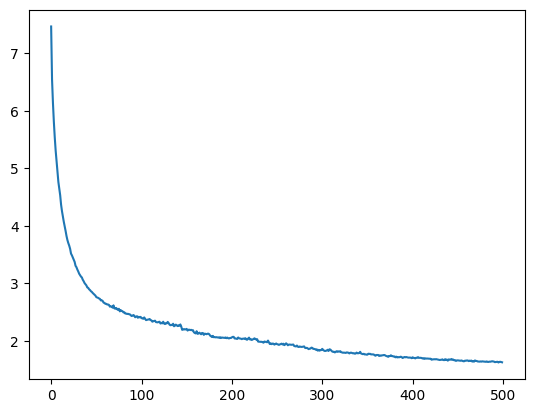

In [220]:
plt.plot(epoch_loss_avg)

In [221]:
input_data = []
for i in range(vocabulary_size):
    input_data.append(i)

In [222]:
input_data = torch.tensor(input_data)

In [223]:
import torch
import torch.nn as nn

# Assume you have a model called `my_model` with an embedding layer
embedding_layer = Transformer_Encoder.embedding  # Get the embedding layer

# Create a sample input data
#input_data = torch.tensor([1, 2, 3, 4, 5])  # example input data

# Pass the input data through the embedding layer
embeddings = embedding_layer(input_data.to(device))

# Now you have the embeddings for the input data
print(embeddings)

tensor([[ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
          0.0000e+00,  0.0000e+00],
        [ 2.2531e-02, -9.0402e-02, -8.7798e-03,  ..., -2.4048e-01,
          1.6094e-01,  8.8011e-02],
        [ 7.0160e-01, -1.1393e+00, -1.2165e+00,  ...,  4.1796e-01,
          7.0060e-01, -9.2757e-01],
        ...,
        [ 5.7240e+00, -4.3590e+00,  1.2230e+00,  ...,  7.2381e-01,
         -1.1959e+00, -1.9633e+00],
        [ 3.1241e+00, -3.3216e+00, -8.4923e-03,  ...,  6.5567e+00,
          2.6492e+00, -4.5170e+00],
        [ 2.1817e+00, -2.0548e+00,  4.7262e-03,  ...,  1.8835e+00,
         -2.4133e+00, -6.6390e-01]], device='cuda:0',
       grad_fn=<EmbeddingBackward0>)


In [224]:
!pip install hdbscan

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import hdbscan


embeddings = embeddings.cpu()
# Загрузка эмбеддингов слов
#embeddings = embeddings_np
embeddings_np = embeddings.detach().numpy()

# Сокращение размерности с помощью t-SNE
tsne = TSNE(n_components=3, perplexity=3)
embeddings_tsne = tsne.fit_transform(embeddings_np)



# Кластеризация с помощью HDBSCAN
clusterer = hdbscan.HDBSCAN(min_cluster_size=6)
clusters = clusterer.fit_predict(embeddings_tsne)

# Визуализация результатов
plt.scatter(embeddings_tsne[:, 0], embeddings_tsne[:, 1], c=clusters)
plt.colorbar()
plt.show()

In [ ]:
# Получение меток классов
labels = clusterer.labels_

# Создание словаря для сопоставления слов и меток классов
word_clusters = dict(zip(vocabulary, labels))

In [ ]:
word_clusters

In [ ]:
# Создание DataFrame из словаря
df = pd.DataFrame(list(word_clusters.items()), columns=['Слово', 'Метка'])

# Запись DataFrame в Excel
df.to_excel('/content/word_clusters.xlsx', index=False)

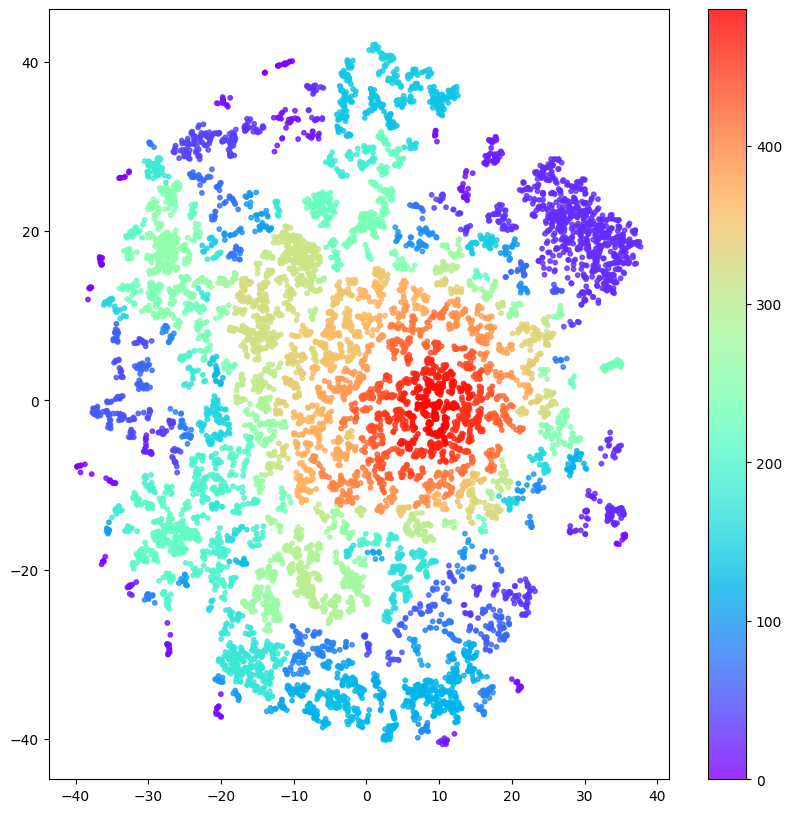

In [225]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import hdbscan

embeddings = embeddings.cpu()
# Преобразование тензора embeddings в массив numpy
embeddings_np = embeddings.detach().numpy()

# Сокращение размерности с помощью t-SNE
tsne = TSNE(n_components=2, perplexity=50, learning_rate=200)
embeddings_tsne = tsne.fit_transform(embeddings_np)

# Кластеризация с помощью HDBSCAN
clusterer = hdbscan.HDBSCAN(min_cluster_size=7)
clusters = clusterer.fit_predict(embeddings_tsne)

# Поиск индексов элементов, относящихся к кластеру -1
indices_to_keep = np.where(clusters != -1)[0]

# Фильтрация embeddings_tsne, оставляем только элементы, не относящиеся к кластеру -1
filtered_embeddings_tsne = embeddings_tsne[indices_to_keep]

# Визуализация результатов
plt.figure(figsize=(10, 10))
plt.scatter(filtered_embeddings_tsne[:, 0], filtered_embeddings_tsne[:, 1], c=clusters[indices_to_keep], cmap='rainbow', s=10, alpha=0.8)
plt.colorbar()
plt.show()